We will use K-means clustering to try to reduce number of different colors in the image, that will lead to compression in size of the image.

In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as img
import imageio
import os

class KmeansForImage:
    
    def __init__( self, imagePath, totalClusters=10, totalIterations=10, showLoadedImage=False ):
        img = imageio.imread(imagePath)
        if showLoadedImage:
            print("Shape of image is {}".format(img.shape));
            plt.imshow(img)
            plt.show()
        self.img = img/255 #scale it down - all points are in range 0-255, so need not normalize
        self.totalClusters = totalClusters
        self.totalIterations = totalIterations
    
    def run( self ):
        #reshape it to 2D matrix - maintaining the number of channels
        data = np.reshape(self.img, (self.img.shape[0] * self.img.shape[1], 
                                             self.img.shape[2]))
        m, n = data.shape;
        means = np.zeros((self.totalClusters, n)) #we find means for each of 3(?) channels
        for i in range(self.totalClusters):
            means[i, :] = data[ np.random.randint(m), :]
         
        clustersIndex = np.zeros(m) #each data point will have a cluster assigned
        for iterationNo in range(self.totalIterations):
            #for each data point, assign a cluster
            for pNo in range(len(data)):
                minimumDistance = 1e3
                for clNo in range(self.totalClusters):
                    distanceFromCluster = np.sqrt( np.sum((data[pNo]-means[clNo])**2) )
                    if( distanceFromCluster < minimumDistance ):
                        minimumDistance = distanceFromCluster
                        clustersIndex[pNo] = clNo
            
            for clNo in range(self.totalClusters):
                sumIs = np.zeros((n,1));
                countIs = 0;
                for pNo in range(len(data)):
                    if(clustersIndex[pNo] == clNo):
                        sumIs = sumIs + data[pNo].reshape(n,1);
                        countIs += 1
                if( countIs == 0 ):
                    countIs = 1;
                means[clNo,:] = np.squeeze(sumIs)/countIs;
        
        #show final compressed image
        img = self.img
        centroids = np.array(means)
        compressed = centroids[clustersIndex.astype(int), :]
        compressed = np.reshape(compressed, (img.shape[0], img.shape[1], 
                                                     img.shape[2])) 
        plt.imshow(compressed)
        filename = './images/compressed_kmeans_{}_{}.png'.format(self.totalClusters,self.totalIterations);
        imageio.imsave(filename, compressed)
        
        #let's log size of file as well
        print('Size of compressed image is {} bytes'.format(os.stat(filename).st_size));
        plt.show()

Shape of image is (128, 128, 3)


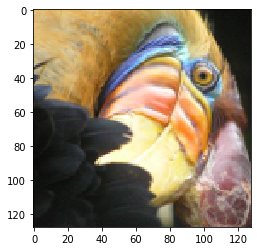

In [29]:
algo = KmeansForImage('./images/bird_small.png', showLoadedImage=True )

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 6694 bytes


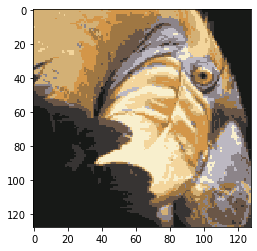

Running k-means with total number of clusters as 10 and number of iterations as 10 took 57.92 secs


In [30]:
import time
start = time.process_time()
algo.run()
print('Running k-means with total number of clusters as {} and number of iterations as {} took {:.2f} secs'.format(algo.totalClusters, algo.totalIterations, time.process_time() - start))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 1468 bytes


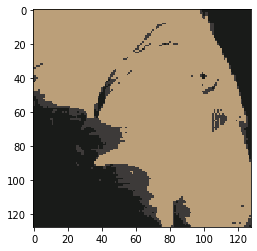

Running k-means with total number of clusters as 3 and number of iterations as 1 tool 2.88 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 2372 bytes


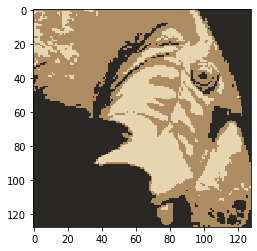

Running k-means with total number of clusters as 3 and number of iterations as 5 tool 12.05 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 2444 bytes


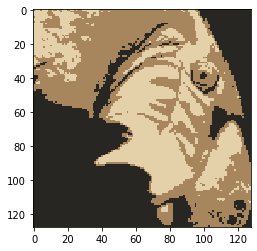

Running k-means with total number of clusters as 3 and number of iterations as 10 tool 21.54 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 2480 bytes


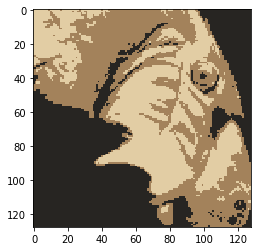

Running k-means with total number of clusters as 3 and number of iterations as 20 tool 40.18 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 3452 bytes


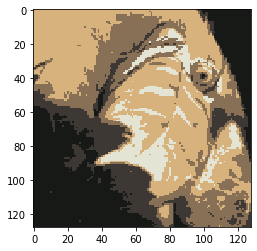

Running k-means with total number of clusters as 5 and number of iterations as 1 tool 5.98 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 3838 bytes


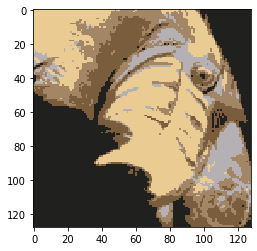

Running k-means with total number of clusters as 5 and number of iterations as 5 tool 16.78 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 3661 bytes


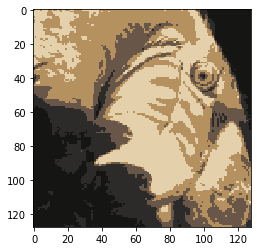

Running k-means with total number of clusters as 5 and number of iterations as 10 tool 30.77 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 3650 bytes


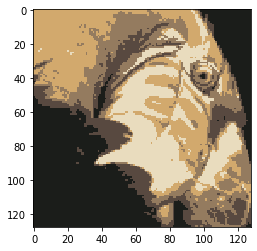

Running k-means with total number of clusters as 5 and number of iterations as 20 tool 63.56 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 6642 bytes


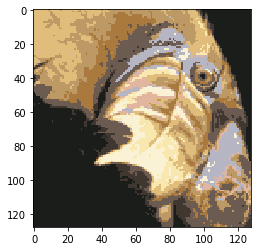

Running k-means with total number of clusters as 10 and number of iterations as 1 tool 8.37 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 6874 bytes


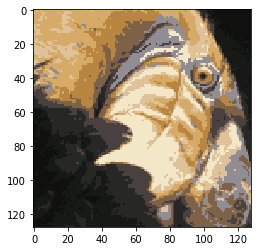

Running k-means with total number of clusters as 10 and number of iterations as 5 tool 30.58 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 7014 bytes


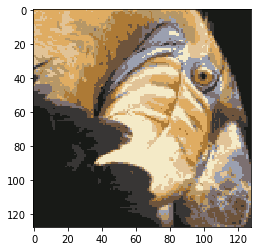

Running k-means with total number of clusters as 10 and number of iterations as 10 tool 59.43 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 6255 bytes


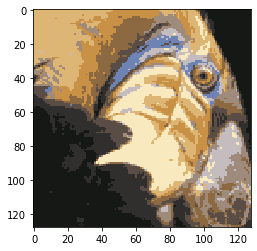

Running k-means with total number of clusters as 10 and number of iterations as 20 tool 113.04 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 10578 bytes


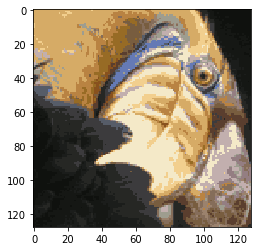

Running k-means with total number of clusters as 20 and number of iterations as 1 tool 13.61 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 10547 bytes


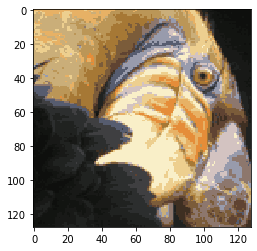

Running k-means with total number of clusters as 20 and number of iterations as 5 tool 56.45 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 10717 bytes


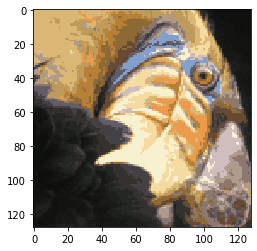

Running k-means with total number of clusters as 20 and number of iterations as 10 tool 111.00 secs
----------------------------------------------------------------------------------------------------


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 10334 bytes


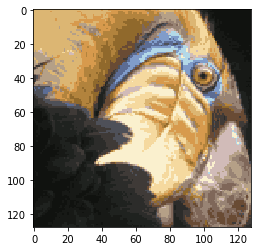

Running k-means with total number of clusters as 20 and number of iterations as 20 tool 225.96 secs
----------------------------------------------------------------------------------------------------


In [33]:
#Let's increase the number of clusters and iterations

for clusters in [3,5,10,20]:
    for iterations in [1,5,10,20]:
        start = time.process_time()
        algo = KmeansForImage('./images/bird_small.png', totalClusters=clusters, totalIterations=iterations );
        algo.run()
        print('Running k-means with total number of clusters as {} and number of iterations as {} tool {:.2f} secs'.format(algo.totalClusters, algo.totalIterations,  time.process_time() - start))
        print('-'*100)


### Takeaway?

We see that as we increase number of clusters, our image becomes more closer to our original one - but at the cost of increase in computation time. We also see that ( more visible in fewer #clusters ) as we increase number of iterations, the image becomes clearer. We also see that fewer iterations on large number of clusters work fairly as well.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Size of compressed image is 18529 bytes


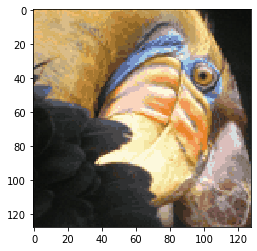

Running k-means with total number of clusters as 50 and number of iterations as 5 tool 130.28 secs
----------------------------------------------------------------------------------------------------


In [34]:
start = time.process_time()
algo = KmeansForImage('./images/bird_small.png', totalClusters=50, totalIterations=5 );
algo.run()
print('Running k-means with total number of clusters as {} and number of iterations as {} tool {:.2f} secs'.format(algo.totalClusters, algo.totalIterations,  time.process_time() - start))
print('-'*100)